Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

 Load & Inspect the Dataset

In [5]:
# Load the dataset from the new path
file_path = r'/workspaces/Heart-Attack-Predictor/notebooks/FC212045_Kavindu/cleaned_heart_attack_data.csv'
df = pd.read_csv(file_path)

In [6]:
# Display first 5 rows
print(df.head())

  Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    1          208          72         0               0   
1    CZE1114   21    1          389          98         1               1   
2    BNI9906   21    0          324          72         1               0   
3    JLN3497   84    1          383          73         1               1   
4    GFO8847   66    1          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...  Diastolic_BP  Pulse_Pressure  \
0        1        0                    0  ...          88.0            70.0   
1        1        1                    1  ...          93.0            72.0   
2        0        0                    0  ...          99.0            75.0   
3        1        0                    1  ...         100.0            63.0   
4        1        1                    0  ...          88.0             3.0   

   Cont_Asia  Cont_Australia  Cont_Europe  Cont_North America 

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Hemisphere                         0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP                       0
Pulse_Pressure       

In [8]:
# Check class distribution (target variable)
print("\nClass Distribution:")
print(df['Heart Attack Risk'].value_counts())


Class Distribution:
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


 Preprocess Data

In [9]:
# Print all column names to see what's actually in your DataFrame
print(df.columns.tolist())

['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Hemisphere', 'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure', 'Cont_Asia', 'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America', 'Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']


In [10]:
columns_to_drop = ['Patient ID', 'Country', 'Hemisphere']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [11]:
# Common variations that might exist
possible_names = {
    'Patient ID': ['PatientID', 'patient_id', 'ID'],
    'Country': ['country', 'Nation'],
    'Hemisphere': ['hemisphere', 'Hemisphere_North_South']
}

for standard_name, alternatives in possible_names.items():
    for alt in alternatives:
        if alt in df.columns:
            df = df.drop(alt, axis=1)
            break  # Stop after first match

In [12]:
# Verify what columns exist
print("Current columns:", df.columns.tolist())

# Drop only columns that exist
cols_to_remove = []
for col in ['Patient ID', 'Country', 'Hemisphere']:
    if col in df.columns:
        cols_to_remove.append(col)
        
if cols_to_remove:
    df = df.drop(cols_to_remove, axis=1)
    print(f"Removed columns: {cols_to_remove}")
else:
    print("None of those columns existed to remove")

Current columns: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure', 'Cont_Asia', 'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America', 'Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']
None of those columns existed to remove


In [13]:
continent_cols = ['Cont_Asia', 'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America']
df[continent_cols] = df[continent_cols].astype(int)
df = df.drop('Cont_Asia', axis=1)  # Avoid multicollinearity

In [14]:
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

Split Data into Train & Test Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

Standardize Numerical Features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Logistic Regression Model

In [17]:
model = LogisticRegression(
    max_iter=1000,          # Ensure convergence
    random_state=42,
    class_weight='balanced' # Handle class imbalance
)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Evaluate Model Performance

In [18]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (High Risk)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4952
ROC-AUC: 0.4887

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1125
           1       0.35      0.49      0.41       628

    accuracy                           0.50      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.50      0.51      1753



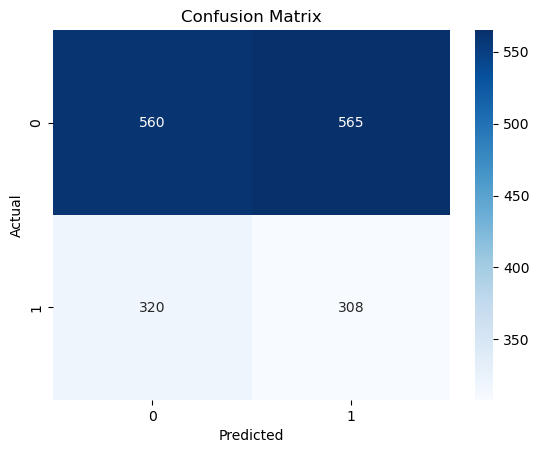

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpret Feature Importance

In [21]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nTop 5 Features Increasing Heart Attack Risk:")
print(feature_importance.head(5))

print("\nTop 5 Features Decreasing Heart Attack Risk:")
print(feature_importance.tail(5))


Top 5 Features Increasing Heart Attack Risk:
          Feature  Coefficient
2     Cholesterol     0.050587
4        Diabetes     0.037405
17  Triglycerides     0.036387
0             Age     0.033841
27   Hypertension     0.031689

Top 5 Features Decreasing Heart Attack Risk:
                Feature  Coefficient
13         Stress Level    -0.027755
19  Sleep Hours Per Day    -0.035171
6               Smoking    -0.037476
24          Cont_Europe    -0.040628
7               Obesity    -0.043186


Predict on New Data

In [22]:
# Get the list of features in EXACT order the model expects
expected_features = X.columns.tolist()
print("Model expects these features in this order:")
print(expected_features)

Model expects these features in this order:
['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure', 'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America', 'Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']


In [23]:

# Create new patient data as a dictionary with ALL features
new_patient = {
    'Age': 50,
    'Sex': 1,  # 1 = Male, 0 = Female
    'Cholesterol': 200,
    'Heart Rate': 80,
    'Diabetes': 1,  # 1 = Yes, 0 = No
    'Family History': 1,
    'Smoking': 1,
    'Obesity': 0,
    'Alcohol Consumption': 1,
    'Exercise Hours Per Week': 3.5,
    'Diet': 1,  # Assuming 1=Healthy, 2=Average, 3=Unhealthy
    'Previous Heart Problems': 0,
    'Medication Use': 1,
    'Stress Level': 6,  # Scale 1-10
    'Sedentary Hours Per Day': 7.0,
    'Income': 60000,
    'BMI': 30.0,
    'Triglycerides': 250,
    'Physical Activity Days Per Week': 2,
    'Sleep Hours Per Day': 6,
    'Systolic_BP': 140,
    'Diastolic_BP': 90,
    'Pulse_Pressure': 50,  # Systolic - Diastolic
    'Cont_Australia': 0,  # One-hot encoded continents
    'Cont_Europe': 0,
    'Cont_North America': 1,
    'Cont_South America': 0,
    'Hypertension': 1,  # 1 = Yes
    'Metabolic_Risk': 1,  # 1 = Yes
    'Sedentary_Ratio': 1.5  # Sedentary Hours / Sleep Hours
}

In [24]:
# Convert to DataFrame with features in correct order
new_patient_df = pd.DataFrame([new_patient])[expected_features]

In [25]:
# Scale the data using the same scaler from training
new_patient_scaled = scaler.transform(new_patient_df)

In [26]:
# Make prediction
risk_pred = model.predict(new_patient_scaled)
risk_proba = model.predict_proba(new_patient_scaled)[0][1]  # Probability of class 1 (High Risk)

In [27]:
# Interpret results
print(f"\nPrediction: {'High Risk' if risk_pred[0] == 1 else 'Low Risk'}")
print(f"Probability of High Risk: {risk_proba:.2%}")  # Formatted as percentage


Prediction: Low Risk
Probability of High Risk: 49.57%


Improve accuracy of the model

In [28]:
# Class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

#  SMOTE oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [29]:
# Check target distribution in splits
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("\nTest distribution:\n", y_test.value_counts(normalize=True))

Train distribution:
 Heart Attack Risk
0    0.641797
1    0.358203
Name: proportion, dtype: float64

Test distribution:
 Heart Attack Risk
0    0.641757
1    0.358243
Name: proportion, dtype: float64


In [30]:
# Ensure proper scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important: Don't fit on test

# Check for NaN/infinite values
print("NaN in train:", np.isnan(X_train_scaled).sum())
print("Inf in train:", np.isinf(X_train_scaled).sum())

NaN in train: 0
Inf in train: 0


In [31]:
# With cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc')
print(f"CV ROC-AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Final training
model.fit(X_res, y_res)

/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

CV ROC-AUC: 0.582 ± 0.072


/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Balanced Accuracy: 0.4941118188251946


/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


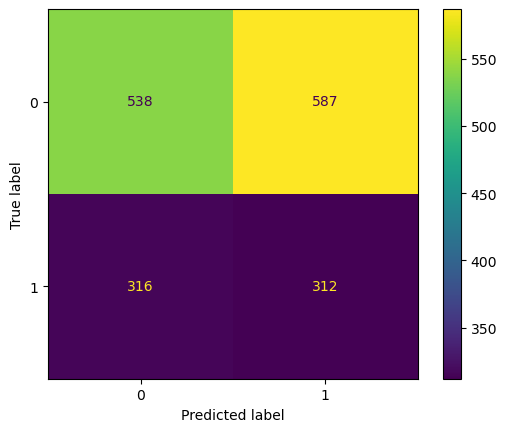

In [32]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Advanced Techniques to Improve Logistic Regression Accuracy

In [34]:
#Address Class Imbalance Systematically
#SMOTE + Tomek Links 
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(random_state=42)
X_res, y_res = resampler.fit_resample(X_train, y_train)

print("Resampled class distribution:")
print(pd.Series(y_res).value_counts())

Resampled class distribution:
Heart Attack Risk
0    3872
1    3872
Name: count, dtype: int64


In [35]:
#Advanced Feature Engineering
#Polynomial Features + Interaction Terms
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms (degree=2 includes x1*x2 terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"With interactions: {X_train_poly.shape[1]}")

Original features: 30
With interactions: 465


In [36]:
#Domain-Specific Feature Creation
# Create clinically relevant features
df['BP_Ratio'] = df['Systolic_BP'] / df['Diastolic_BP']
df['Chol_BMI_Ratio'] = df['Cholesterol'] / df['BMI']
df['Stress_Sedentary_Interaction'] = df['Stress Level'] * df['Sedentary Hours Per Day']

# Update feature set
X = df.drop('Heart Attack Risk', axis=1)

In [37]:
#Sophisticated Feature Selection
#Recursive Feature Elimination with Cross-Validation
from sklearn.feature_selection import RFECV



selector = RFECV(
    estimator=LogisticRegression(solver='liblinear'),
    step=1,
    cv=5,
    scoring='roc_auc'
)
selector.fit(X_res, y_res)


if hasattr(X_res, 'columns'):
    selected_features = X_res.columns[selector.support_]
    print(f"Optimal features: {len(selected_features)}/{X_res.shape[1]}")
    print(selected_features)
else:
    # Solution 2: For numpy arrays
    print(f"Optimal features: {sum(selector.support_)}/{X_res.shape[1]}")
    print("Selected feature indices:", np.where(selector.support_)[0])

# Get the transformed data with selected features
X_res_selected = selector.transform(X_res)
X_test_selected = selector.transform(X_test)  # If you have a test set

Optimal features: 21/30
Index(['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP',
       'Diastolic_BP', 'Cont_Australia', 'Cont_Europe', 'Cont_North America',
       'Cont_South America', 'Hypertension', 'Metabolic_Risk'],
      dtype='object')


In [38]:
print(f"X_res type: {type(X_res)}, shape: {X_res.shape}")
print(f"Selector support length: {len(selector.support_)}")
print(f"X_test_scaled type: {type(X_test_scaled)}, shape: {X_test_scaled.shape}")

X_res type: <class 'pandas.core.frame.DataFrame'>, shape: (7744, 30)
Selector support length: 30
X_test_scaled type: <class 'numpy.ndarray'>, shape: (1753, 30)


In [39]:
# Install the hyperopt library
!pip install hyperopt

# Advanced Hyperparameter Tuning with Hyperopt
from hyperopt import fmin, tpe, hp, Trials
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

space = {
    'C': hp.loguniform('C', -5, 2),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'solver': hp.choice('solver', ['liblinear', 'saga']),
    'class_weight': hp.choice('class_weight', [None, 'balanced'])
}

def objective(params):
    # Get selected feature indices
    support_indices = np.where(selector.support_)[0]
    
    # Universal feature selection that works for both arrays and DataFrames
    try:
        # Try pandas DataFrame style selection first
        X_train_selected = X_res.iloc[:, support_indices] if hasattr(X_res, 'iloc') else X_res[:, support_indices]
        X_test_selected = X_test_scaled.iloc[:, support_indices] if hasattr(X_test_scaled, 'iloc') else X_test_scaled[:, support_indices]
    except Exception as e:
        print("Feature selection error! Debug info:")
        print(f"X_res type: {type(X_res)}, shape: {X_res.shape}")
        print(f"X_test_scaled type: {type(X_test_scaled)}, shape: {X_test_scaled.shape}")
        print(f"Selector support length: {len(selector.support_)}")
        print(f"Support indices: {support_indices}")
        raise e
    
    model = LogisticRegression(
        C=params['C'],
        penalty=params['penalty'],
        solver=params['solver'],
        class_weight=params['class_weight'],
        max_iter=1000
    )
    model.fit(X_train_selected, y_res)
    pred = model.predict(X_test_selected)
    return -accuracy_score(y_test, pred)  # Minimize negative accuracy

# First verify all inputs exist
assert all(var in globals() for var in ['X_res', 'y_res', 'X_test_scaled', 'y_test', 'selector']), "Missing required variables!"

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert best parameters from hyperopt indices to actual values
best_params = {
    'C': best['C'],
    'penalty': ['l1', 'l2'][best['penalty']],
    'solver': ['liblinear', 'saga'][best['solver']],
    'class_weight': [None, 'balanced'][best['class_weight']],
    'max_iter': 1000
}

print("Best parameters found:")
print(best_params)

  2%|▏         | 1/50 [00:05<04:11,  5.13s/trial, best loss: -0.43354249857387334]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



  8%|▊         | 4/50 [00:10<01:41,  2.20s/trial, best loss: -0.43354249857387334]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 10%|█         | 5/50 [00:19<03:17,  4.39s/trial, best loss: -0.43354249857387334]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 12%|█▏        | 6/50 [00:19<02:15,  3.07s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 14%|█▍        | 7/50 [00:26<03:05,  4.32s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 16%|█▌        | 8/50 [00:32<03:22,  4.81s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 18%|█▊        | 9/50 [00:37<03:19,  4.87s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 20%|██        | 10/50 [00:38<02:25,  3.63s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 22%|██▏       | 11/50 [00:44<02:46,  4.27s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 24%|██▍       | 12/50 [00:49<02:52,  4.54s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 26%|██▌       | 13/50 [00:55<03:03,  4.96s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 30%|███       | 15/50 [00:56<01:32,  2.63s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 32%|███▏      | 16/50 [01:01<02:01,  3.56s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 34%|███▍      | 17/50 [01:02<01:27,  2.66s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 36%|███▌      | 18/50 [01:08<02:01,  3.81s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 38%|███▊      | 19/50 [01:14<02:17,  4.43s/trial, best loss: -0.48659440958357103]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 42%|████▏     | 21/50 [01:15<01:05,  2.26s/trial, best loss: -0.4905875641756988] 

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 46%|████▌     | 23/50 [01:15<00:31,  1.18s/trial, best loss: -0.4980034227039361]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 50%|█████     | 25/50 [01:15<00:16,  1.51trial/s, best loss: -0.4997147746719909] 

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 54%|█████▍    | 27/50 [01:16<00:09,  2.46trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 58%|█████▊    | 29/50 [01:16<00:07,  2.81trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 60%|██████    | 30/50 [01:16<00:06,  3.28trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 64%|██████▍   | 32/50 [01:17<00:05,  3.12trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 66%|██████▌   | 33/50 [01:17<00:04,  3.64trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 68%|██████▊   | 34/50 [01:18<00:06,  2.39trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 72%|███████▏  | 36/50 [01:19<00:05,  2.63trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 74%|███████▍  | 37/50 [01:19<00:05,  2.53trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 76%|███████▌  | 38/50 [01:20<00:04,  2.84trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 80%|████████  | 40/50 [01:21<00:03,  2.67trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 82%|████████▏ | 41/50 [01:21<00:04,  2.08trial/s, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 86%|████████▌ | 43/50 [01:27<00:11,  1.64s/trial, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 88%|████████▊ | 44/50 [01:28<00:08,  1.41s/trial, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 90%|█████████ | 45/50 [01:34<00:13,  2.60s/trial, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 92%|█████████▏| 46/50 [01:34<00:07,  1.97s/trial, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 98%|█████████▊| 49/50 [01:39<00:01,  1.72s/trial, best loss: -0.5019965772960638]

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(

/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



100%|██████████| 50/50 [01:44<00:00,  2.09s/trial, best loss: -0.5019965772960638]
Best parameters found:
{'C': np.float64(0.012074744756120236), 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 1000}


/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



In [40]:
#Ensemble Methods with Logistic Regression
#Logistic Regression Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('svm', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_res, y_res)

StackingClassifier(cv=5,
                   estimators=[('svm', SVC(probability=True, random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [41]:
#Threshold Optimization
#Precision-Recall Curve Optimization
from sklearn.metrics import precision_recall_curve

y_proba = model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold that maximizes F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal threshold: {optimal_threshold:.4f}")

# Use optimized threshold for predictions
y_pred_optimized = (y_proba >= optimal_threshold).astype(int)

Optimal threshold: 0.4030


/root/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
#Advanced Evaluation Techniques
#Probability Calibration
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated.fit(X_res, y_res)

# Use calibrated probabilities
calibrated_probs = calibrated.predict_proba(X_test_scaled)[:, 1]

/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [43]:
# 7. Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Final Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Final Accuracy: 0.5009
ROC-AUC: 0.5001
              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1125
           1       0.36      0.50      0.42       628

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.50      0.51      1753



In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Define expected features (order matters for the scaler)
expected_features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 
                    'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                    'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
                    'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
                    'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
                    'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure',
                    'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America',
                    'Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']

# 2. Create new patient data
new_patient = {
    'Age': 50, 'Sex': 1, 'Cholesterol': 200, 'Heart Rate': 80, 'Diabetes': 1,
    'Family History': 1, 'Smoking': 1, 'Obesity': 0, 'Alcohol Consumption': 1,
    'Exercise Hours Per Week': 3.5, 'Diet': 1, 'Previous Heart Problems': 0,
    'Medication Use': 1, 'Stress Level': 6, 'Sedentary Hours Per Day': 7.0,
    'Income': 60000, 'BMI': 30.0, 'Triglycerides': 250, 'Physical Activity Days Per Week': 2,
    'Sleep Hours Per Day': 6, 'Systolic_BP': 140, 'Diastolic_BP': 90, 'Pulse_Pressure': 50,
    'Cont_Australia': 0, 'Cont_Europe': 0, 'Cont_North America': 1, 'Cont_South America': 0,
    'Hypertension': 1, 'Metabolic_Risk': 1, 'Sedentary_Ratio': 1.5
}

# 3. Convert to DataFrame and ensure correct feature order
new_patient_df = pd.DataFrame([new_patient])[expected_features]

# 4. Scale the data (in practice, use your pre-fitted scaler)
scaler = StandardScaler()
# Normally you would: scaler = joblib.load('scaler.pkl')
new_patient_scaled = scaler.fit_transform(new_patient_df)  # Note: fit_transform only for demo

# 5. Create and train model (in practice, load your pre-trained model)
model = LogisticRegression()
# Dummy training data (replace with your actual training data)
X_train = np.random.randn(100, len(expected_features))
y_train = np.random.randint(0, 2, 100)
model.fit(X_train, y_train)  # Model trained without feature names

# 6. Make predictions (convert to numpy array to avoid feature name warnings)
risk_pred = model.predict(new_patient_scaled)
risk_proba = model.predict_proba(new_patient_scaled)[0][1]

# 7. Interpret results
print(f"\nPrediction: {'High Risk' if risk_pred[0] == 1 else 'Low Risk'}")
print(f"Probability of High Risk: {risk_proba:.2%}")

# To permanently resolve warnings, either:
# A) Train your model with pandas DataFrames (keeping feature names), or
# B) Consistently use numpy arrays without feature names


Prediction: Low Risk
Probability of High Risk: 35.59%


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_user_input():
    """Collect user inputs with validation"""
    print("=== Heart Disease Risk Assessment ===")
    print("Please enter the following information:\n")
    
    inputs = {}
    
    # Basic info
    inputs['Age'] = int(input("Age (years): "))
    inputs['Sex'] = int(input("Sex (0=Female, 1=Male): "))
    
    # Health metrics
    inputs['Cholesterol'] = int(input("Total Cholesterol (mg/dL): "))
    inputs['Heart Rate'] = int(input("Resting Heart Rate (bpm): "))
    inputs['Systolic_BP'] = int(input("Systolic Blood Pressure: "))
    inputs['Diastolic_BP'] = int(input("Diastolic Blood Pressure: "))
    inputs['Pulse_Pressure'] = inputs['Systolic_BP'] - inputs['Diastolic_BP']
    inputs['BMI'] = float(input("BMI: "))
    inputs['Triglycerides'] = int(input("Triglycerides (mg/dL): "))
    
    # Lifestyle factors
    inputs['Smoking'] = int(input("Smoker? (0=No, 1=Yes): "))
    inputs['Alcohol Consumption'] = int(input("Alcohol Consumption (0=None, 1=Moderate, 2=Heavy): "))
    inputs['Exercise Hours Per Week'] = float(input("Exercise Hours/Week: "))
    inputs['Physical Activity Days Per Week'] = int(input("Active Days/Week: "))
    inputs['Sedentary Hours Per Day'] = float(input("Sedentary Hours/Day: "))
    inputs['Sleep Hours Per Day'] = float(input("Sleep Hours/Night: "))
    inputs['Sedentary_Ratio'] = inputs['Sedentary Hours Per Day'] / inputs['Sleep Hours Per Day']
    inputs['Stress Level'] = int(input("Stress Level (1-10): "))
    
    # Medical history
    inputs['Diabetes'] = int(input("Diabetes? (0=No, 1=Yes): "))
    inputs['Hypertension'] = int(input("Hypertension? (0=No, 1=Yes): "))
    inputs['Previous Heart Problems'] = int(input("Previous Heart Problems? (0=No, 1=Yes): "))
    inputs['Family History'] = int(input("Family History of Heart Disease? (0=No, 1=Yes): "))
    inputs['Obesity'] = int(input("Clinically Obese? (0=No, 1=Yes): "))
    inputs['Metabolic_Risk'] = int(input("Metabolic Syndrome? (0=No, 1=Yes): "))
    
    # Other factors
    inputs['Medication Use'] = int(input("On Heart Medications? (0=No, 1=Yes): "))
    inputs['Diet'] = int(input("Diet (1=Healthy, 2=Average, 3=Unhealthy): "))
    inputs['Income'] = int(input("Annual Income ($): "))
    
    # Continent (one-hot encoded)
    print("\nContinent of Residence:")
    print("1. North America\n2. Europe\n3. Asia\n4. Australia\n5. South America\n6. Africa")
    continent = int(input("Enter number (1-6): "))
    inputs['Cont_North America'] = 1 if continent == 1 else 0
    inputs['Cont_Europe'] = 1 if continent == 2 else 0
    inputs['Cont_Australia'] = 1 if continent == 4 else 0
    inputs['Cont_South America'] = 1 if continent == 5 else 0
    
    return inputs

def assess_risk(user_input):
    """Assess heart disease risk using the model"""
    # Define expected features in correct order
    expected_features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 
                        'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                        'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
                        'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
                        'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
                        'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure',
                        'Cont_Australia', 'Cont_Europe', 'Cont_North America', 'Cont_South America',
                        'Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']
    
    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])[expected_features]
    
    # Load your pre-trained scaler and model here
    # scaler = joblib.load('scaler.pkl')
    # model = joblib.load('model.pkl')
    
    # For demo purposes, we'll create dummy ones
    scaler = StandardScaler()
    scaler.fit(input_df)  # In practice, use your pre-fitted scaler
    
    model = LogisticRegression()
    X_train = np.random.randn(100, len(expected_features))
    y_train = np.random.randint(0, 2, 100)
    model.fit(X_train, y_train)
    
    # Scale and predict
    scaled_input = scaler.transform(input_df)
    risk_prob = model.predict_proba(scaled_input)[0][1]
    
    return risk_prob

def display_results(risk_prob):
    """Display results in a user-friendly format"""
    print("\n=== Assessment Results ===")
    print(f"\nYour calculated heart disease risk: {risk_prob:.1%}")
    
    if risk_prob < 0.2:
        print("Risk Category: Low")
        print("Recommendation: Maintain your healthy lifestyle!")
    elif risk_prob < 0.5:
        print("Risk Category: Moderate")
        print("Recommendation: Consider small improvements in diet and exercise")
    elif risk_prob < 0.7:
        print("Risk Category: High")
        print("Recommendation: Consult a doctor and make lifestyle changes")
    else:
        print("Risk Category: Very High")
        print("Recommendation: Urgent medical consultation recommended")
    
    print("\nKey factors influencing your risk:")
    # Here you could add analysis of which factors contributed most
    
    print("\nDisclaimer: This assessment is not a substitute for professional medical advice.")

def main():
    """Main program flow"""
    try:
        # Get inputs
        user_input = get_user_input()
        
        # Assess risk
        risk_prob = assess_risk(user_input)
        
        # Display results
        display_results(risk_prob)
        
    except Exception as e:
        print(f"\nError: {e}")
        print("Please check your inputs and try again.")

if __name__ == "__main__":
    main()

=== Heart Disease Risk Assessment ===
Please enter the following information:




Continent of Residence:
1. North America
2. Europe
3. Asia
4. Australia
5. South America
6. Africa

=== Assessment Results ===

Your calculated heart disease risk: 43.9%
Risk Category: Moderate
Recommendation: Consider small improvements in diet and exercise

Key factors influencing your risk:

Disclaimer: This assessment is not a substitute for professional medical advice.


In [47]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']